# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [21]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [25]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [31]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [35]:
# Extract all rows of data
mars_table = soup.find('table')
rows = mars_table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [37]:
# Create an empty list
table_data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    # Find all cells in the row
    cells = row.find_all('td')  # Use <th> instead of <td> if the row contains header cells
    # If the row contains data, process it
    if cells:
        # Extract the text from each cell and strip extra whitespace
        row_data = [cell.text.strip() for cell in cells]
        table_data.append(row_data)

In [49]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_df = pd.DataFrame(table_data, columns=columns)

In [51]:
# Confirm DataFrame was created successfully
print(mars_df.head())

   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [59]:
# Examine data type of each column
print(mars_df.head())

   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


In [61]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['id'] = mars_df['id'].astype(int)            # Convert 'id' to integer
mars_df['sol'] = mars_df['sol'].astype(int)          # Convert 'sol' to integer
mars_df['ls'] = mars_df['ls'].astype(float)          # Convert 'ls' to float
mars_df['month'] = mars_df['month'].astype(int)      # Convert 'month' to integer
mars_df['min_temp'] = mars_df['min_temp'].astype(float)  # Convert 'min_temp' to float
mars_df['pressure'] = mars_df['pressure'].astype(float)  # Convert 'pressure' to float

In [65]:
# Confirm type changes were successful by examining data types again
print(mars_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   float64       
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int32(3)
memory usage: 80.4 KB
None


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [67]:
# 1. How many months are there on Mars?
num_months = mars_df['month'].nunique()
print(f"There are {num_months} months on Mars.")

There are 12 months on Mars.


In [69]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = mars_df['sol'].count()
print(f"The dataset contains {num_sols} Martian sols of data.")

The dataset contains 1867 Martian sols of data.


In [75]:
# 3. What is the average minimum temperature by month?
avg_min_temp = mars_df.groupby('month')['min_temp'].mean()
avg_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

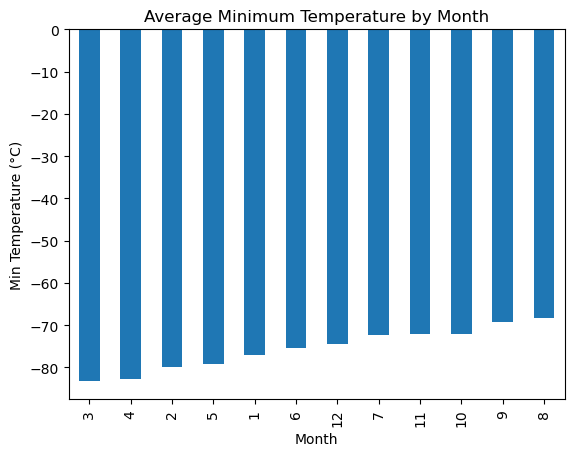

In [83]:
# Plot the average minimum temperature by month
avg_min_temp_sorted.plot(kind='bar', title='Average Minimum Temperature by Month', xlabel='Month', ylabel='Min Temperature (°C)')
plt.show()

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64


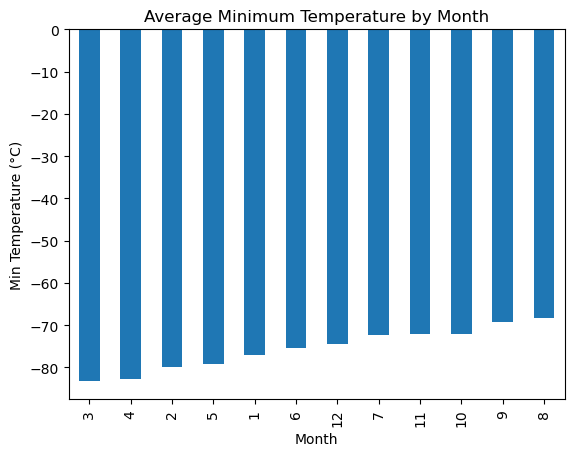

In [87]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_temp = mars_df.groupby('month')['min_temp'].mean()
avg_min_temp_sorted = avg_min_temp.sort_values()
print(avg_min_temp_sorted)
avg_min_temp_sorted.plot(kind='bar', title='Average Minimum Temperature by Month', xlabel='Month', ylabel='Min Temperature (°C)')
plt.show()

In [101]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_df.groupby('month')['pressure'].mean()
print(avg_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


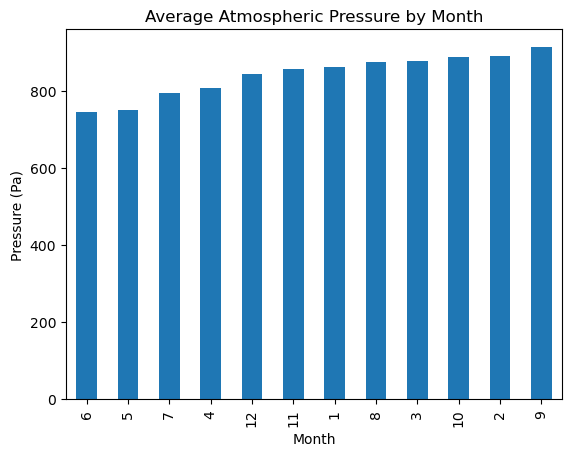

In [99]:
# Plot the average pressure by month
avg_pressure_sorted.plot(kind='bar', title='Average Atmospheric Pressure by Month', xlabel='Month', ylabel='Pressure (Pa)')
plt.show()

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64


<Axes: title={'center': 'Average Atmospheric Pressure by Month (Sorted)'}, xlabel='Month', ylabel='Pressure (Pa)'>

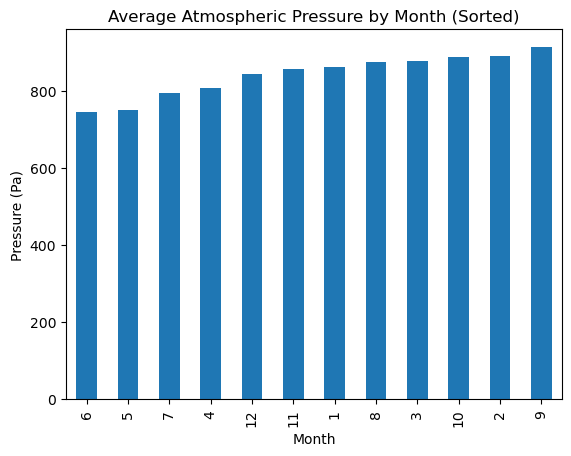

In [103]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure_sorted = avg_pressure_by_month.sort_values()
print(avg_pressure_sorted)
avg_pressure_sorted.plot(kind='bar', title='Average Atmospheric Pressure by Month (Sorted)', xlabel='Month', ylabel='Pressure (Pa)')

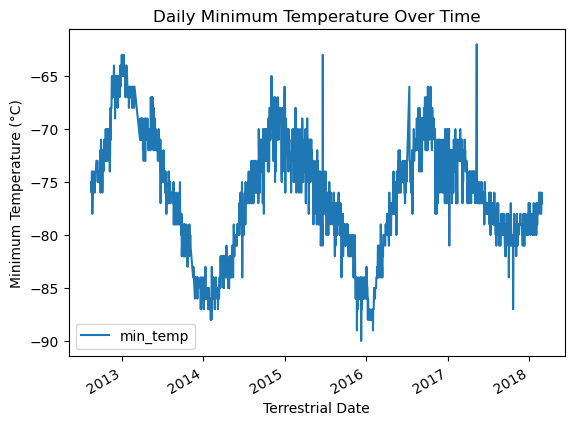

In [109]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_df.plot(x='terrestrial_date', y='min_temp', kind='line', title='Daily Minimum Temperature Over Time', xlabel='Terrestrial Date', ylabel='Minimum Temperature (°C)', linestyle='-')
plt.show()

#### Minimum Temperature

#From the average temperature by month graph, sorted from lowerest to highest, we can clearly see that March has, in average, the lowest temperature. (-83.307292) 

#### Atmospheric Pressure

# From the average atmospheric pressure by month graph, sorted, we see June typically has the lowest pressure (745.054422 pa) where as September has the highest pressure (913.305970 pa)

#### Year Length

# Martian year is approximately  Earth days. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [111]:
# Write the data to a CSV
mars_df.to_csv('mars_data.csv', index=False)
print("Data has been successfully written to 'mars_data.csv'.")

Data has been successfully written to 'mars_data.csv'.


In [22]:
browser.quit()